In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import networkx as nx

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.autolayout'] = False
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['lines.markeredgewidth'] = 1.2
mpl.rcParams['errorbar.capsize'] = 5
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['xtick.minor.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 6
mpl.rcParams['ytick.minor.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 6
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams['font.family'] = 'sans-serif'
cm_colors = plt.get_cmap('Set2')


# ibm_brisbane Experiment with 30 to 100 qubits

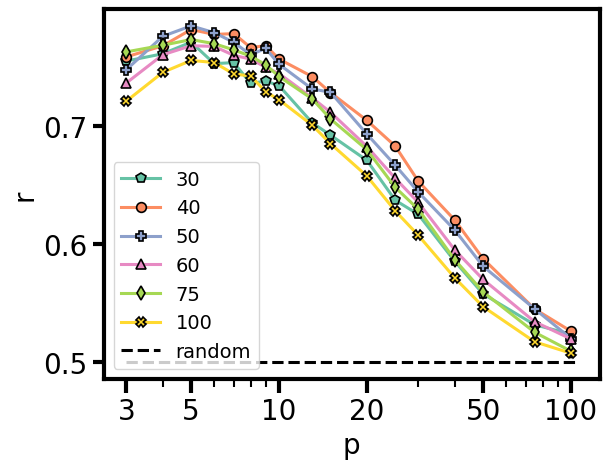

In [60]:
nqs = [30,40,50,60,75,100]
backend_name = "ibm_brisbane"
results_brisbane = {nq:np.load(f"./Data/{backend_name}/{nq}_1D.npy", allow_pickle=True).item() for nq in nqs}

delta = 1
colors = plt.get_cmap("Set2")
fig, ax = plt.subplots()
markers = {30:"p", 40:"o", 50:"P", 60:"^", 75:"d", 100:"X"}
for nn, nq in enumerate(results_brisbane.keys()):
    res_nq = results_brisbane[nq]["postprocessing"]
    ps = list(res_nq[delta].keys())
    secs = list(res_nq[delta][ps[0]].keys())
    rs = np.array([[res_nq[delta][p][sec]["r"] for p in ps] for sec in secs])
    best_sec = np.argmax(rs.max(axis=1))
    ax.plot(ps, rs[best_sec], label = f"{nq}", marker=markers[nq], markeredgecolor="black", color=colors(nn), markersize=7)
ax.plot([3, 105], [0.5, 0.5], label="random", color="black", linestyle="--")
ax.set_ylabel("r")
ax.set_xlabel("p")

ax.legend()
ax.set_xscale("log")
ps = [3,5,10,20,50,100]
ax.set_xticks(ps)
ax.set_xticklabels(ps);


# Eagle and Heron QPUs comparative results

QPU: ibm_marrakesh |  r = 0.7725692307692306 | p_eff = 8
QPU: ibm_fez |  r = 0.776613846153846 | p_eff = 9
QPU: ibm_torino |  r = 0.7282861538461537 | p_eff = 9
QPU: ibm_brisbane |  r = 0.7560153846153844 | p_eff = 5
QPU: ibm_sherbrooke |  r = 0.7209246153846152 | p_eff = 5
QPU: ibm_kyiv |  r = 0.7232769230769228 | p_eff = 4
QPU: ibm_nazca |  r = 0.6727430769230768 | p_eff = 5
QPU: ibm_kyoto |  r = 0.6615830769230767 | p_eff = 4
QPU: ibm_osaka |  r = 0.6745399999999998 | p_eff = 8
QPU: ibm_brussels |  r = 0.7191769230769229 | p_eff = 5
QPU: ibm_strasbourg |  r = 0.7109923076923075 | p_eff = 5


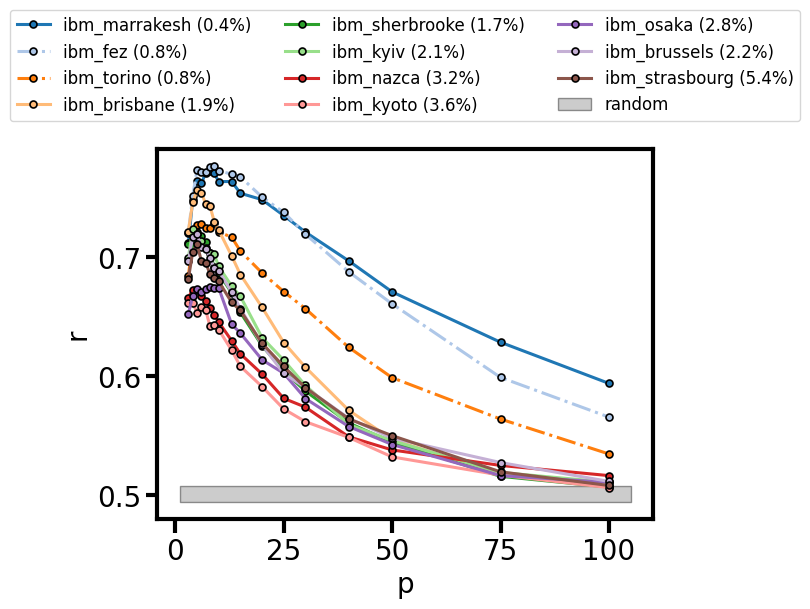

In [52]:
names = ["ibm_marrakesh", "ibm_fez","ibm_torino", "ibm_brisbane", "ibm_sherbrooke", "ibm_kyiv", "ibm_nazca", "ibm_kyoto", "ibm_osaka", "ibm_brussels", "ibm_strasbourg"]
nq = 100
results = {backend_name:np.load(f"./Data/{backend_name}/{nq}_1D.npy", allow_pickle=True).item() for backend_name in names}

fig, ax = plt.subplots()
delta = 1
nq = 100
kk = 0
case = ""
colors = plt.get_cmap("tab20")
EPLG = {"ibm_marrakesh":" (0.4%)","ibm_torino":" (0.8%)", "ibm_brisbane":" (1.9%)", "ibm_sherbrooke":" (1.7%)", "ibm_kyiv":" (2.1%)", "ibm_osaka":" (2.8%)",
         "ibm_nazca":" (3.2%)", "ibm_kyoto":" (3.6%)", "ibm_kyiv":" (2.1%)", "ibm_fez":" (0.8%)", "ibm_brussels":" (2.2%)", "ibm_strasbourg":" (5.4%)"}
for nn, backend_name in enumerate(names):
    res_backend = results[backend_name]["postprocessing"+case]
    if backend_name == "ibm_brisbane":
        res_random = results[backend_name]["random"+case]
    ps = list(res_backend[delta].keys())
    rs = [res_backend[delta][p][kk]["r"] for p in ps]
    print(f"QPU: {backend_name} |  r = {max(rs)} | p_eff = {ps[np.argmax(rs)]}")
    ax.plot(ps, rs, label=backend_name + EPLG[backend_name], marker="o", markeredgecolor="black", color=colors(nn), linestyle= "-." if backend_name in ["ibm_torino", "ibm_fez"] else "-")

rand_data = res_random["results"][:,1]
rand_mean = []
for i in range(10000):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))
rand_mean = np.array(rand_mean)
y1 = rand_mean.mean()
y2 = 3*rand_mean.std()
ax.fill_between([1, 105], [y1-y2,y1-y2], [y1+y2,y1+y2], color="grey", alpha=0.4, edgecolor="black", label="random")

# ax.plot([0,100], [0.5, 0.5], label="random", color="black", linestyle="--")
ax.legend(loc="upper center", bbox_to_anchor=(0.5,1.4), ncol=3, fontsize=12)
ax.set_ylabel("r")
ax.set_xlabel("p")
# ax.set_xscale("log")
fig.savefig(f"./Figures/1D-Chain/comparison_100q_{case}.pdf", bbox_inches="tight", transparent=True)


# Repetition of the same experiment on ibm_brisbane during 2 months

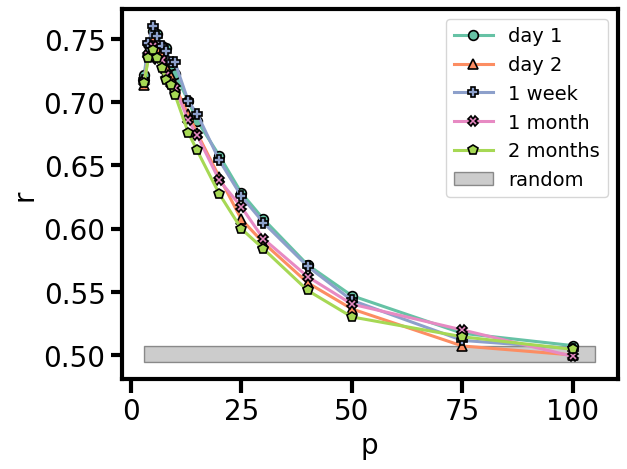

In [6]:
delta = 1
backend_name ="ibm_brisbane"
colors = plt.get_cmap("Set2")
nq = 100
case = ""
fig, ax = plt.subplots()
results = {"day 1": np.load(f"./Data/{backend_name}/{nq}_1D.npy", allow_pickle=True).item(),
            "day 2": np.load(f"./Data/{backend_name}/{nq}_1D_day2.npy", allow_pickle=True).item(),
            "1 week": np.load(f"./Data/{backend_name}/{nq}_1D_week.npy", allow_pickle=True).item(),
            "1 month": np.load(f"./Data/{backend_name}/{nq}_1D_month.npy", allow_pickle=True).item(),
            "2 months": np.load(f"./Data/{backend_name}/{nq}_1D_2month.npy", allow_pickle=True).item()}

markers = {"day 1":"o", "day 2": "^", "1 week":"P", "1 month": "X", "2 months":"p"}
r_max = []
for nn, name in enumerate(results.keys()):
    res_nq = results[name]["postprocessing"+case]
    ps = list(res_nq[delta].keys())
    secs = list(res_nq[delta][ps[0]].keys())
    rs = np.array([[res_nq[delta][p][sec]["r"] for p in ps] for sec in secs])
    r_max.append(rs.max(axis=1))
    best_sec = np.argmax(rs.max(axis=1))
    ax.plot(ps, rs[best_sec], label = name, marker=markers[name], markeredgecolor="black", color=colors(nn), markersize=7)

rand_data = []
for v, c in zip(results["day 1"]["random"+case]["results"][:,1],results["day 1"]["random"+case]["results"][:,2]):
    rand_data += int(c) * [v]
rand_mean = []
for i in range(10):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))
rand_mean = np.array(rand_mean)
y1 = rand_mean.mean()
y2 = 3*rand_mean.std()
ax.fill_between([3, 105], [y1-y2,y1-y2], [y1+y2,y1+y2], color="grey", alpha=0.4, edgecolor="black", label="random")

# ax.plot([3, 105], [0.5, 0.5], label="random", color="black", linestyle="--")
ax.set_ylabel("r")
ax.set_xlabel("p")
xx = np.arange(3, 100)
a = 0.434
b = 0.381
c = 0.606
# plt.plot(xx, ((1-b)**np.log(xx) - c) + (1 - np.exp(-a*xx)))
ax.legend()
# ax.set_xscale("log")
# fig.savefig(f"./Figures/1D/{backend_name}_differen_days{case}.pdf", bbox_inches="tight", transparent=True)

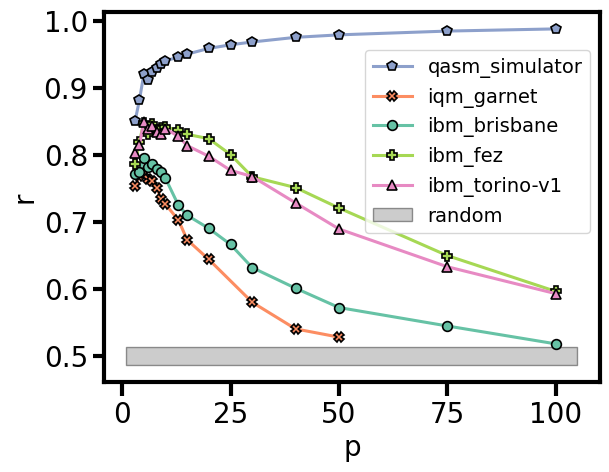

In [12]:
nq = 19
case = ""
prop = "r"
backends = [ "qasm_simulator","iqm_garnet", "ibm_brisbane", "ibm_fez"]
results = {name:np.load(f"./Data/{name}/{nq}_1D.npy", allow_pickle=True).item() for name in backends}
results["ibm_torino-v1"] = np.load(f"./Data/ibm_torino/{nq}_1D_udpdate.npy", allow_pickle=True).item()
markers = {"ibm_brisbane":"o", "iqm_garnet":"X", "qasm_simulator":"p", "ibm_torino-v1":"^", "ibm_fez":"P"}

# ibm_brisbane = np.load(f"./Data/iqm_garnet/{nq}_1D_1.npy", allow_pickle=True).item()

colors = plt.get_cmap("Set2")
color = {"ibm_brisbane":colors(0), "iqm_garnet":colors(1), "qasm_simulator":colors(2), "ibm_torino-v1":colors(3), "ibm_fez":colors(4)}
fig, ax = plt.subplots()
for name in results.keys():
    delta = results[name]["Deltas"][0]
    ps = results[name]["ps"]
    best_mean = 0
    for sec_i in  results[name][f"postprocessing{case}"][delta][ps[0]].keys():
        res_i = [results[name][f"postprocessing{case}"][delta][p][sec_i][prop] for p in ps]
        if np.max(res_i) > best_mean:
            best_sec = res_i
            best_mean = np.max(res_i)
    ax.plot(results[name]["ps"], best_sec, label=name, color=color[name], marker=markers[name], markeredgecolor="black", markersize=7)

rand_data = []
for v, c in zip(results["qasm_simulator"]["random"+case]["results"][:,1],results["qasm_simulator"]["random"+case]["results"][:,2]):
    rand_data += int(c) * [v]
rand_mean = []
for i in range(100):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))
rand_mean = np.array(rand_mean)
y1 = rand_mean.mean()
y2 = 3*rand_mean.std()
ax.fill_between([1, 105], [y1-y2,y1-y2], [y1+y2,y1+y2], color="gray", alpha=0.4, edgecolor="black", label="random")

ax.legend(loc="center right", bbox_to_anchor=(1,0.65))
ax.set_ylabel(prop)
ax.set_xlabel("p")
fig.savefig(f"./Figures/1D-Chain/IQM_IBM_comparison_{nq}{case}_{prop}.pdf", bbox_inches="tight", transparent=True)

# Largest experiment: p=10.000 layers 

QPU: ibm_fez |  r = (np.float64(0.8076692307692307), 15)


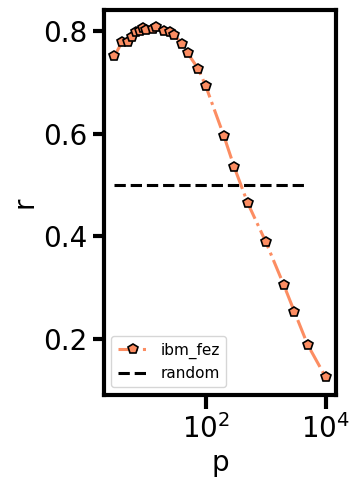

In [54]:
ibm_fez = np.load("./Data/ibm_fez/100_1Dp5000b.npy", allow_pickle=True).item()
ibm_fez_10000 = np.load("./Data/ibm_fez/100_1Dp10000.npy", allow_pickle=True).item()

color = plt.get_cmap("Set3")
fig, ax = plt.subplots(figsize=(3,5))
ps = ibm_fez["ps"]
# ax.plot(results["ps"][:-2], results["r"][10]["ideal"][:-2], color="black", linewidth=2, linestyle="--", label=r"noiseless")

colors = plt.get_cmap("Set2")
delta = 1
case = ""
prop = "r"

ps = ibm_fez["ps"] 
n2q = ps
n2q = np.array([150*i for i in ibm_fez["ps"]])
delta = 0.75
ax.plot(ps, len(ps)*[ibm_fez["random"+case][prop]], linestyle="--", color="black")

ax.plot(ps+ [10_000], [ibm_fez["postprocessing"+case][delta][p][0][prop] for p in ps] + [ibm_fez_10000["postprocessing"+case][delta][10_000][0][prop]], marker="p", label ="ibm_fez", markeredgecolor="black", markersize=7, color=colors(1), linestyle="-.")
# ax.plot(ps, [max(ibm_fez["postprocessing"+case][delta][p][0]["results"][:,1]) for p in ps], marker="p", markeredgecolor="black", markersize=7, color=colors(1), linestyle="-.", alpha=0.3)

print(f'QPU: ibm_fez |  r = {max([ibm_fez["postprocessing"+case][delta][p][0][prop] for p in ps]), ps[np.argmax([ibm_fez["postprocessing"+case][delta][p][0][prop] for p in ps])]}')

ax.plot([],[], label ="random" ,color="black", linestyle="--")
ax.legend(fontsize=11, loc=3)
ax.set_ylabel("r")
ax.set_xlabel("p")
ax.set_xscale("log")
# ax.set_xticks([10,300, 5000])
# ax.set_xticklabels([10,300, 5000])

# ax.set_xticks([3, 10, 25, 50, 75, 100])
fig.savefig(f"./Figures/1D-Chain/fez_p5000.pdf", bbox_inches="tight", transparent=True)

QPU = qasm_simulator | delta = 1 | r = 1.0
QPU = iqm_garnet | delta = 1 | r = 0.749
QPU = ibm_fez | delta = 1 | r = 0.868
QPU = ibm_marrakesh | delta = 1 | r = 0.923
QPU = ibm_brisbane | delta = 1 | r = 0.843
QPU = ankaa_2 | delta = 1 | r = 0.608


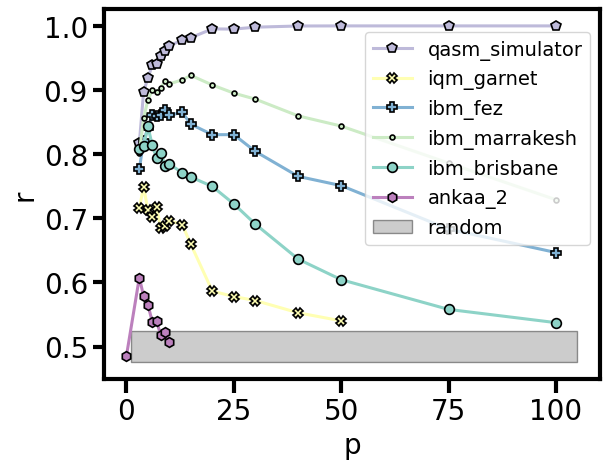

In [3]:
# Define the number of qubits in the problem
nq = 5  

# Define additional suffix for post-processing case (if any)
case = ""  # "" or "_mitig"

# Property to plot (e.g., "r" represents the approximation ratio or prob probability of success)
prop = "r"  

# List of quantum backends to compare
backends = ["qasm_simulator", "iqm_garnet", "ibm_fez", "ibm_marrakesh", "ibm_brisbane", "ankaa_2"]

# Load results for each backend from stored numpy files
results = {name: np.load(f"./Data/{name}/{nq}_1D.npy", allow_pickle=True).item() for name in backends}

# Define markers for different backends
markers = {
    "ibm_marrakesh": ".", "ibm_brisbane": "o", "iqm_garnet": "X",
    "qasm_simulator": "p", "ibm_torino-v1": "^", "ibm_fez": "P", "ankaa_2": "h"
}

# Define colors for different backends using a color map
colors = plt.get_cmap("Set3")
color = {
    "ibm_marrakesh": colors(10), "ibm_brisbane": colors(0), "iqm_garnet": colors(1),
    "qasm_simulator": colors(2), "ibm_torino-v1": colors(3), "ibm_fez": colors(4),
    "ankaa_2": colors(9)
}

# Initialize the plot
fig, ax = plt.subplots()

# Iterate over each backend to plot performance results
for name in results.keys():
    delta = results[name]["Deltas"][0]  # Extract delta value
    ps = results[name]["ps"]  # Extract QAOA layer depths
    best_mean = 0  # Store the best mean result

    # Iterate over all available sections of post-processed results
    for sec_i in results[name][f"postprocessing{case}"][delta][ps[0]].keys():
        res_i = [results[name][f"postprocessing{case}"][delta][p][sec_i][prop] for p in ps]

        # Update best section based on the highest mean value
        if np.mean(res_i) > best_mean:
            best_sec = res_i
            best_mean = np.mean(res_i)

    # Print the best approximation ratio for this backend
    print(f"QPU = {name} | delta = {delta} | r = {round(max(best_sec), 3)}")

    # Plot the performance of this backend
    ax.plot(results[name]["ps"], best_sec, label=name, color=color[name], marker=markers[name], 
            markeredgecolor="black", markersize=7)

# Generate random baseline data for comparison
rand_data = []
for v, c in zip(results["qasm_simulator"]["random"+case]["results"][:, 1], 
                results["qasm_simulator"]["random"+case]["results"][:, 2]):
    rand_data += int(c) * [v]

# Compute statistics over 100 random samples
rand_mean = []
for i in range(100):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))

# Convert random mean values to numpy array
rand_mean = np.array(rand_mean)

# Compute the mean and standard deviation for the random baseline
y1 = rand_mean.mean()
y2 = 3 * rand_mean.std()

# Plot a shaded region to represent the random baseline performance
ax.fill_between([1, 105], [y1 - y2, y1 - y2], [y1 + y2, y1 + y2], 
                color="gray", alpha=0.4, edgecolor="black", label="random")

# Add labels and legend
ax.legend(loc="center right", bbox_to_anchor=(1, 0.65))
ax.set_ylabel(prop)
ax.set_xlabel("p")

# Save the figure as a PDF
fig.savefig(f"./Figures/1D-Chain/IQM_IBM_comparison_{nq}{case}_{prop}.pdf", 
            bbox_inches="tight", transparent=True)


QPU = qasm_simulator | probability = 1.0
QPU = iqm_garnet | probability = 0.335
QPU = ibm_fez | probability = 0.605
QPU = ibm_marrakesh | probability = 0.761
QPU = ibm_brisbane | probability = 0.454
QPU = ankaa_2 | probability = 0.144


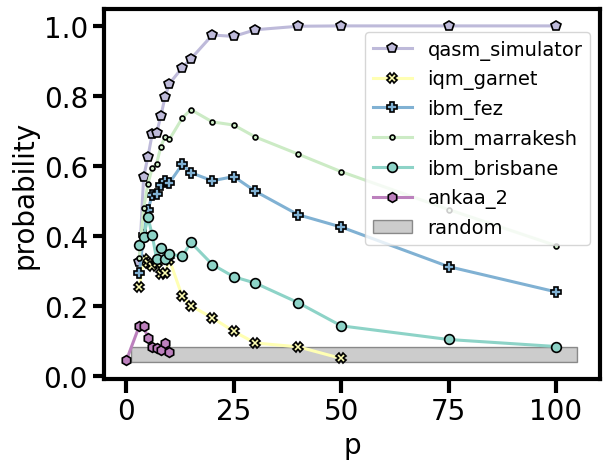

In [56]:
# Define the number of qubits in the problem
nq = 5  

# Define additional suffix for post-processing case (if any)
case = ""  # "" or "_mitig"

# Property to plot (e.g., "r" represents the approximation ratio or "probability" probability of success)
prop = "probability"  

# List of quantum backends to compare
backends = ["qasm_simulator", "iqm_garnet", "ibm_fez", "ibm_marrakesh", "ibm_brisbane", "ankaa_2"]

# Load results for each backend from stored numpy files
results = {name: np.load(f"./Data/{name}/{nq}_1D.npy", allow_pickle=True).item() for name in backends}

# Define markers for different backends
markers = {
    "ibm_marrakesh": ".", "ibm_brisbane": "o", "iqm_garnet": "X",
    "qasm_simulator": "p", "ibm_torino-v1": "^", "ibm_fez": "P", "ankaa_2": "h"
}

# Define colors for different backends using a color map
colors = plt.get_cmap("Set3")
color = {
    "ibm_marrakesh": colors(10), "ibm_brisbane": colors(0), "iqm_garnet": colors(1),
    "qasm_simulator": colors(2), "ibm_torino-v1": colors(3), "ibm_fez": colors(4),
    "ankaa_2": colors(9)
}

# Initialize the plot
fig, ax = plt.subplots()

# Iterate over each backend to plot performance results
for name in results.keys():
    delta = results[name]["Deltas"][0]  # Extract delta value
    ps = results[name]["ps"]  # Extract QAOA layer depths
    best_mean = 0  # Store the best mean result

    # Iterate over all available sections of post-processed results
    for sec_i in results[name][f"postprocessing{case}"][delta][ps[0]].keys():
        res_i = [results[name][f"postprocessing{case}"][delta][p][sec_i][prop] for p in ps]

        # Update best section based on the highest mean value
        if np.mean(res_i) > best_mean:
            best_sec = res_i
            best_mean = np.mean(res_i)

    # Print the best approximation ratio for this backend
    print(f"QPU = {name} | {prop} = {round(max(best_sec), 3)}")

    # Plot the performance of this backend
    ax.plot(results[name]["ps"], best_sec, label=name, color=color[name], marker=markers[name], 
            markeredgecolor="black", markersize=7)

# Generate random baseline data for comparison
rand_data = []
for v, c in zip(results["qasm_simulator"]["random"+case]["results"][:, 1], 
                results["qasm_simulator"]["random"+case]["results"][:, 2]):
    rand_data += int(c) * [v]

# Compute statistics over 100 random samples
rand_mean = []
for i in range(100):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(np.array(rand_data[:1000]) == 1.0))

# Convert random mean values to numpy array
rand_mean = np.array(rand_mean)

# Compute the mean and standard deviation for the random baseline
y1 = rand_mean.mean()
y2 = 3 * rand_mean.std()

# Plot a shaded region to represent the random baseline performance
ax.fill_between([1, 105], [y1 - y2, y1 - y2], [y1 + y2, y1 + y2], 
                color="gray", alpha=0.4, edgecolor="black", label="random")

# Add labels and legend
ax.legend(loc="center right", bbox_to_anchor=(1, 0.65))
ax.set_ylabel(prop)
ax.set_xlabel("p")

# Save the figure as a PDF
fig.savefig(f"./Figures/1D-Chain/IQM_IBM_comparison_{nq}{case}_{prop}.pdf", 
            bbox_inches="tight", transparent=True)


In [47]:
np.mean(np.array(rand_data[:1000]) == 1.0)

np.float64(0.059)